In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

#Alabama
al = gpd.read_file(r"C:\Users\be81h\Documents\408_cel\homework_2_\Homework_2\cb_2024_01_place_500k\cb_2024_01_place_500k.shp")

<Axes: >

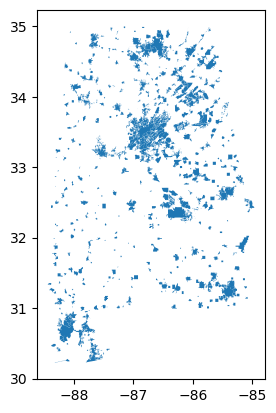

In [126]:
al.plot()

In [5]:
print(al)

    STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID         NAME  \
0        01   32704  02403782  1600000US0132704  0132704   Haleyville   
1        01   45472  02406131  1600000US0145472  0145472     McIntosh   
2        01   53784  02406982  1600000US0153784  0153784      Newbern   
3        01   78204  02405634  1600000US0178204  0178204       Valley   
4        01   02836  02405172  1600000US0102836  0102836      Ashford   
..      ...     ...       ...               ...      ...          ...   
589      01   63984  02407191  1600000US0163984  0163984   Reece City   
590      01   29296  02406555  1600000US0129296  0129296  Gaylesville   
591      01   44536  02406051  1600000US0144536  0144536  Lowndesboro   
592      01   55440  02407012  1600000US0155440  0155440    Notasulga   
593      01   63495  02582695  1600000US0163495  0163495          Ray   

             NAMELSAD STUSPS STATE_NAME LSAD     ALAND  AWATER  \
0     Haleyville city     AL    Alabama   25  21713018  1

In [127]:
al = al.to_crs(epsg=3857)

# Calculate area and perimeter
al['area'] = al.geometry.area
al['perimeter'] = al.geometry.length

# Calculate Circularity Ratio: 4 * pi * Area / Perimeter^2
al['circularity'] = (4 * 3.14159 * al['area']) / (al['perimeter'] ** 2)

# Filter for circles (circularity > 0.85)
circular_shapes = al[al['circularity'] > 0.90]
print(circular_shapes)

    STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID            NAME  \
256      01   55992  02407028  1600000US0155992  0155992          Oakman   
289      01   30448  02406586  1600000US0130448  0130448       Goldville   
383      01   16240  02406288  1600000US0116240  0116240  Coffee Springs   
386      01   09016  02405315  1600000US0109016  0109016        Brantley   

                NAMELSAD STUSPS STATE_NAME LSAD    ALAND  AWATER  \
256          Oakman town     AL    Alabama   43  7981750   22558   
289       Goldville town     AL    Alabama   43  2552525   39434   
383  Coffee Springs town     AL    Alabama   43  2030176   29256   
386        Brantley town     AL    Alabama   43  8047471  130826   

                                              geometry          area  \
256  POLYGON ((-9730013.12 3990557.908, -9729903.80...  1.152912e+07   
289  POLYGON ((-9550415.04 3906372.648, -9550331.21...  3.642895e+06   
383  POLYGON ((-9564428.939 3654591.619, -9564308.4...  2.7432

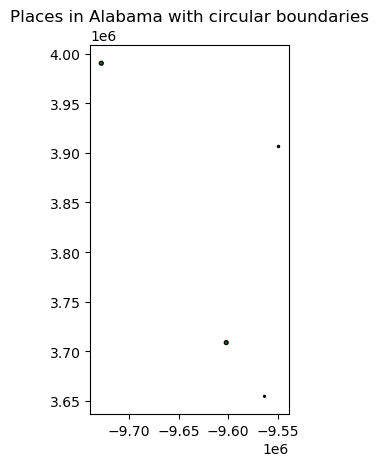

In [103]:
# Select rows (first row, index 0)
multiple_element = al.iloc[[256, 289, 383, 386]] 

# Plot the elements
fig, ax = plt.subplots()
multiple_element.plot(ax=ax, color='green', edgecolor='black')

# Add context and plot
plt.title("Places in Alabama with circular boundaries")
plt.show()

<Axes: >

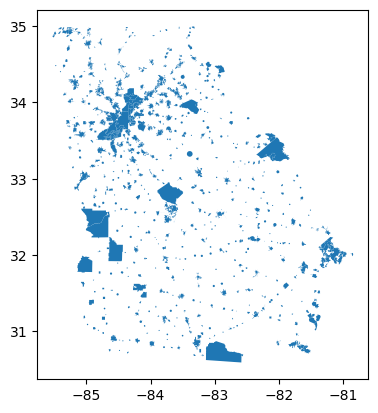

In [133]:
#Georgia
ga = gpd.read_file(r"C:\Users\be81h\Documents\408_cel\homework_2_\Homework_2\cb_2024_13_place_500k\cb_2024_13_place_500k.shp")

ga.plot()

In [134]:
print(ga)

    STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID               NAME  \
0        13   84176  02405788  1600000US1384176  1384176          Woodstock   
1        13   41932  02404792  1600000US1341932  1341932             Jasper   
2        13   23480  02406387  1600000US1323480  1323480            Dooling   
3        13   06688  02403849  1600000US1306688  1306688          Bellville   
4        13   31292  02403659  1600000US1331292  1331292           Franklin   
..      ...     ...       ...               ...      ...                ...   
670      13   27736  02587035  1600000US1327736  1327736            Epworth   
671      13   57232  02407021  1600000US1357232  1357232           Oak Park   
672      13   59735  02710337  1600000US1359735  1359735  Peachtree Corners   
673      13   83084  02405748  1600000US1383084  1383084         Williamson   
674      13   28632  02402472  1600000US1328632  1328632           Fairview   

                   NAMELSAD STUSPS STATE_NAME LSAD 

In [135]:
ga = ga.to_crs(epsg=3857)

# Calculate area and perimeter
ga['area'] = ga.geometry.area
ga['perimeter'] = ga.geometry.length

# Calculate Circularity Ratio: 4 * pi * Area / Perimeter^2
ga['circularity'] = (4 * 3.14159 * ga['area']) / (ga['perimeter'] ** 2)

# Filter for circles 
circular_shapes = ga[ga['circularity'] > 0.90]

print(circular_shapes)

    STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID          NAME  \
6        13   32412  02406557  1600000US1332412  1332412        Geneva   
8        13   59416  02407077  1600000US1359416  1359416       Parrott   
9        13   01808  02405142  1600000US1301808  1301808        Alston   
10       13   50260  02406110  1600000US1350260  1350260        Maxeys   
16       13   16908  02404075  1600000US1316908  1316908        Climax   
..      ...     ...       ...               ...      ...           ...   
572      13   22752  02406378  1600000US1322752  1322752        Dexter   
573      13   64680  02404607  1600000US1364680  1364680         Rentz   
580      13   73620  02405529  1600000US1373620  1373620     Stillmore   
586      13   15648  02404036  1600000US1315648  1315648      Chauncey   
642      13   41708  02404782  1600000US1341708  1341708  Jacksonville   

              NAMELSAD STUSPS STATE_NAME LSAD    ALAND  AWATER  \
6          Geneva town     GA    Georgia   43

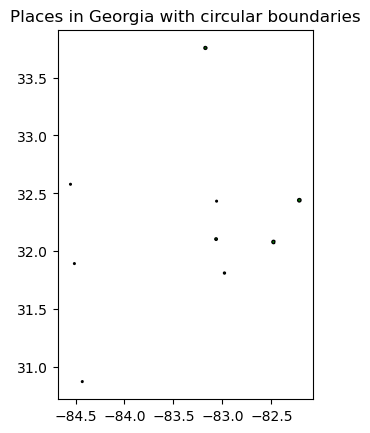

In [131]:
# Select rows ( first row, index 0)
multiple_element = ga.iloc[[6, 8, 9, 10, 16, 572, 580, 586, 642]] 

# Plot the specific elements
fig, ax = plt.subplots()
multiple_element.plot(ax=ax, color='green', edgecolor='black')

# Add context and plot

plt.title("Places in Georgia with circular boundaries")
plt.show()

<Axes: >

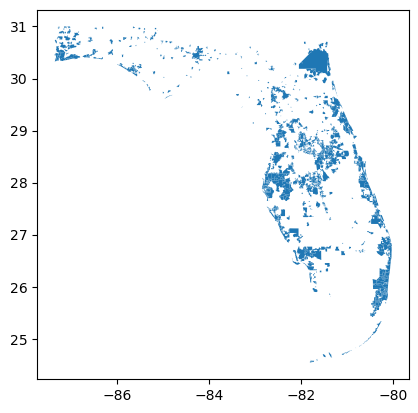

In [136]:
# Florida
fl = gpd.read_file(r"C:\Users\be81h\Documents\408_cel\homework_2_\Homework_2\cb_2024_12_place_500k\cb_2024_12_place_500k.shp")

fl.plot()

In [137]:
print(fl)

    STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID               NAME  \
0        12   53150  02404445  1600000US1253150  1253150       Ormond Beach   
1        12   37775  02404863  1600000US1237775  1237775          Lake City   
2        12   44075  02406143  1600000US1244075  1244075  Melbourne Village   
3        12   26075  02406577  1600000US1226075  1226075      Glen St. Mary   
4        12   35850  02405926  1600000US1235850  1235850         Juno Beach   
..      ...     ...       ...               ...      ...                ...   
951      12   45350  02403285  1600000US1245350  1245350         Middleburg   
952      12   04975  02405231  1600000US1204975  1204975               Bell   
953      12   57908  02583376  1600000US1257908  1257908        Point Baker   
954      12   73725  02402960  1600000US1273725  1273725               Vamo   
955      12   25987  02402526  1600000US1225987  1225987          Gladeview   

                   NAMELSAD STUSPS STATE_NAME LSAD 

In [138]:
fl = fl.to_crs(epsg=3857)

# Calculate area and perimeter
fl['area'] = fl.geometry.area
fl['perimeter'] = fl.geometry.length

# Calculate Circularity Ratio: 4 * pi * Area / Perimeter^2
fl['circularity'] = (4 * 3.14159 * fl['area']) / (fl['perimeter'] ** 2)

# Filter for circles (circularity > 0.82)
circular_shapes = fl[fl['circularity'] > 0.82]
print(circular_shapes)

   STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID                NAME  \
88      12   03975  02405217  1600000US1203975  1203975  Bay Harbor Islands   

                   NAMELSAD STUSPS STATE_NAME LSAD    ALAND  AWATER  \
88  Bay Harbor Islands town     FL    Florida   43  1026596   64027   

                                             geometry          area  \
88  POLYGON ((-8921054.38 2985311.76, -8920881.278...  1.330337e+06   

      perimeter  circularity  
88  4499.571046     0.825713  


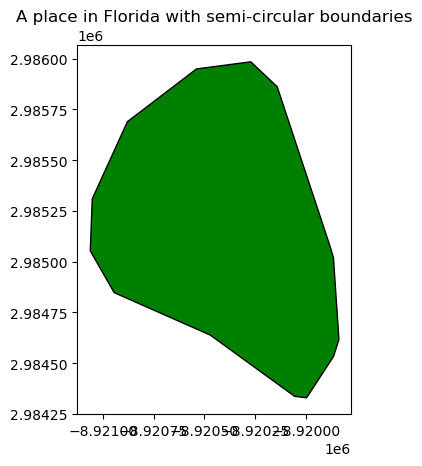

In [139]:
# Select row ( first row, index 0)
single_element = fl.iloc[[88]] 

# Plot the specific element
fig, ax = plt.subplots()
single_element.plot(ax=ax, color='green', edgecolor='black')

# Add context and plot

plt.title("A place in Florida with semi-circular boundaries")
plt.show()

<Axes: >

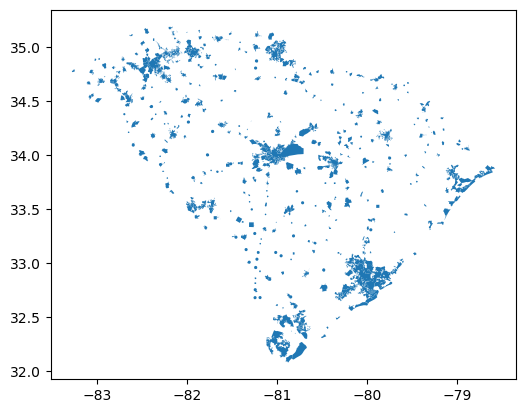

In [140]:
# South Carolina
sc = gpd.read_file(r"C:\Users\be81h\Documents\408_cel\homework_2_\Homework_2\cb_2024_45_place_500k\cb_2024_45_place_500k.shp")

sc.plot()

In [141]:
print(sc)

    STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID           NAME  \
0        45   06850  02405279  1600000US4506850  4506850       Blenheim   
1        45   68470  02407388  1600000US4568470  4568470    Springfield   
2        45   59920  02407206  1600000US4559920  4559920       Richburg   
3        45   35890  02405893  1600000US4535890  4535890           Irmo   
4        45   36610  02405909  1600000US4536610  4536610      Jefferson   
..      ...     ...       ...               ...      ...            ...   
470      45   75850  02405706  1600000US4575850  4575850  West Columbia   
471      45   59425  02407197  1600000US4559425  4559425      Reidville   
472      45   66760  02407347  1600000US4566760  4566760       Six Mile   
473      45   50560  02407002  1600000US4550560  4550560          North   
474      45   36475  02405903  1600000US4536475  4536475      Jamestown   

               NAMELSAD STUSPS      STATE_NAME LSAD     ALAND  AWATER  \
0         Blenheim town   

In [142]:
sc = sc.to_crs(epsg=3857)

# Calculate area and perimeter
sc['area'] = sc.geometry.area
sc['perimeter'] = sc.geometry.length

# Calculate Circularity Ratio: 4 * pi * Area / Perimeter^2
sc['circularity'] = (4 * 3.14159 * sc['area']) / (sc['perimeter'] ** 2)

# Filter for circles (circularity > 0.85)
circular_shapes = sc[sc['circularity'] > 0.99]
print(circular_shapes)

    STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID          NAME  \
1        45   68470  02407388  1600000US4568470  4568470   Springfield   
8        45   42865  02406053  1600000US4542865  4542865        Lowrys   
11       45   68875  02406661  1600000US4568875  4568875         Starr   
35       45   66400  02407343  1600000US4566400  4566400  Silverstreet   
40       45   23200  02406429  1600000US4523200  4523200      Ehrhardt   
178      45   38950  02405957  1600000US4538950  4538950         Kline   
266      45   33820  02405834  1600000US4533820  4533820         Hilda   

              NAMELSAD STUSPS      STATE_NAME LSAD    ALAND  AWATER  \
1     Springfield town     SC  South Carolina   43  4504598       0   
8          Lowrys town     SC  South Carolina   43  8186503       0   
11          Starr town     SC  South Carolina   43  3879331    6330   
35   Silverstreet town     SC  South Carolina   43  8671049       0   
40       Ehrhardt town     SC  South Carolina   43  

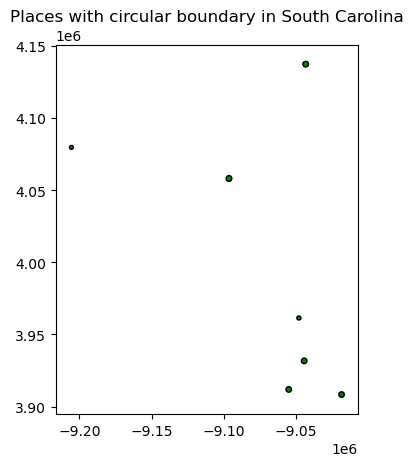

In [143]:
# Select rows ( first row, index 0)
multiple_element = sc.iloc[[1,8,11,35,40,178,266]] 

# Plot the elements
fig, ax = plt.subplots()
multiple_element.plot(ax=ax, color='green', edgecolor='black')

# Add context and plot
plt.title("Places with circular boundary in South Carolina")
plt.show()

<Axes: >

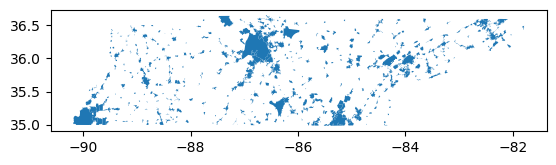

In [144]:
# Tennessee 
tn = gpd.read_file(r"C:\Users\be81h\Documents\408_cel\homework_2_\Homework_2\cb_2024_47_place_500k\cb_2024_47_place_500k.shp")

tn.plot()

In [145]:
print(tn)

    STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID              NAME  \
0        47   15400  02404070  1600000US4715400  4715400         Cleveland   
1        47   07840  02405310  1600000US4707840  4707840            Braden   
2        47   69420  02407356  1600000US4769420  4769420            Smyrna   
3        47   43640  02406043  1600000US4743640  4743640  Lookout Mountain   
4        47   12380  02406243  1600000US4712380  4712380        Centertown   
..      ...     ...       ...               ...      ...               ...   
499      47   59240  02407135  1600000US4759240  4759240     Pleasant Hill   
500      47   78600  02405696  1600000US4778600  4778600        Waynesboro   
501      47   36580  02405874  1600000US4736580  4736580        Huntingdon   
502      47   46700  02405042  1600000US4746700  4746700      Maynardville   
503      47   35220  02813070  1600000US4735220  4735220          Holladay   

                  NAMELSAD STUSPS STATE_NAME LSAD     ALAND  AW

In [146]:
tn = tn.to_crs(epsg=3857)

# Calculate area and perimeter
tn['area'] = tn.geometry.area
tn['perimeter'] = tn.geometry.length

# Calculate Circularity Ratio: 4 * pi * Area / Perimeter^2
tn['circularity'] = (4 * 3.14159 * tn['area']) / (tn['perimeter'] ** 2)

# Filter for circles (circularity > 0.85)
circular_shapes = tn[tn['circularity'] > 0.75]
print(circular_shapes)

    STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID          NAME  \
43       47   55280  02813109  1600000US4755280  4755280         Ocoee   
362      47   14220  02586044  1600000US4714220  4714220  Chesterfield   

             NAMELSAD STUSPS STATE_NAME LSAD     ALAND  AWATER  \
43          Ocoee CDP     TN  Tennessee   57   2415490       0   
362  Chesterfield CDP     TN  Tennessee   57  19897193   37110   

                                              geometry          area  \
43   POLYGON ((-9431857.556 4180311.837, -9431371.8...  3.609946e+06   
362  POLYGON ((-9828783.564 4250091.479, -9828723.4...  3.027142e+07   

        perimeter  circularity  
43    7615.302773     0.782233  
362  22300.661184     0.764904  


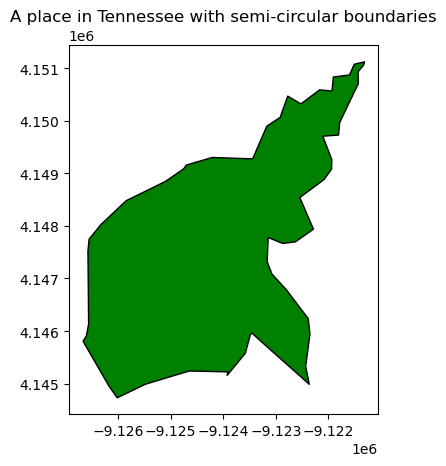

In [147]:
# Select rows ( first row, index 0)
multiple_element = sc.iloc[[362]] 

# Plot the elements
fig, ax = plt.subplots()
multiple_element.plot(ax=ax, color='green', edgecolor='black')

# Add context and plot
plt.title("A place in Tennessee with semi-circular boundaries")
plt.show()